# 1. Previsão da Categoria de Obesidade

## 1.1 Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

## 1.2 Visualizando Dados (Sem Filtro)

In [2]:
data = pd.read_csv('./obesity_data.csv', sep=',')

In [3]:
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
data.shape

(1000, 7)

In [5]:
print(data.describe())

               Age       Height       Weight          BMI  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.857000   170.052417    71.205769    24.888317   
std      18.114267    10.309971    15.509849     6.193912   
min      18.000000   136.115719    26.065730     8.470572   
25%      35.000000   163.514205    61.129629    20.918068   
50%      50.000000   169.801665    71.929072    24.698647   
75%      66.000000   177.353596    81.133746    28.732132   
max      79.000000   201.419670   118.907366    50.791898   

       PhysicalActivityLevel  
count            1000.000000  
mean                2.534000  
std                 1.116284  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 4.000000  


## 1.3 Gráficos e Análises

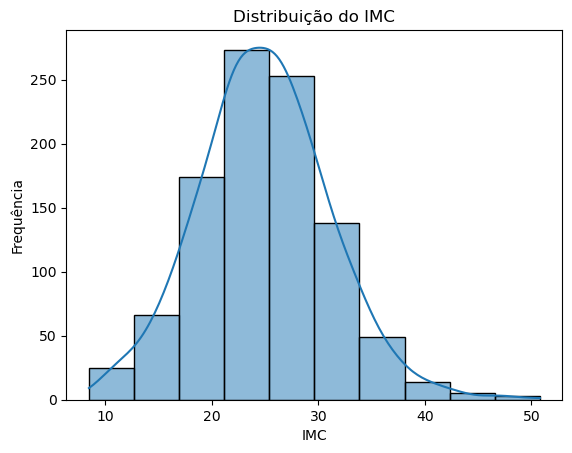

In [6]:
sns.histplot(data['BMI'], bins=10, kde=True)
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

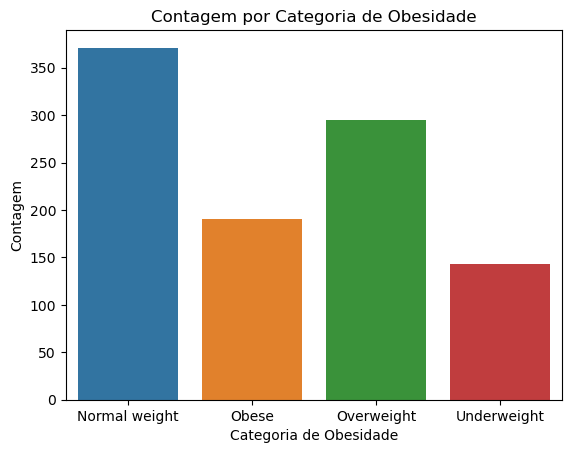

In [7]:
sns.countplot(x='ObesityCategory', data=data)
plt.title('Contagem por Categoria de Obesidade')
plt.xlabel('Categoria de Obesidade')
plt.ylabel('Contagem')
plt.show()

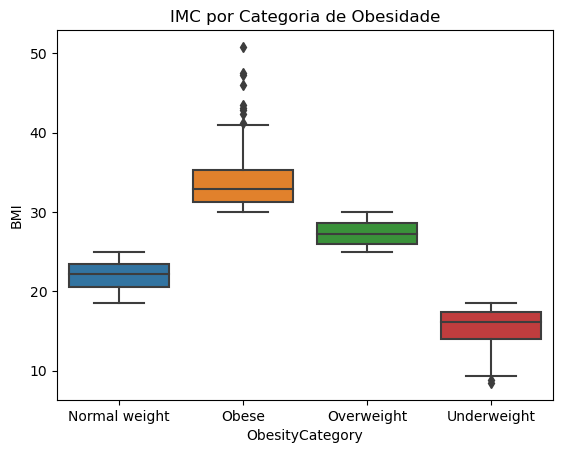

In [8]:
sns.boxplot(x='ObesityCategory', y='BMI', data=data)
plt.title('IMC por Categoria de Obesidade')
plt.show()

## 1.4 Intervalo do IMC / BMI

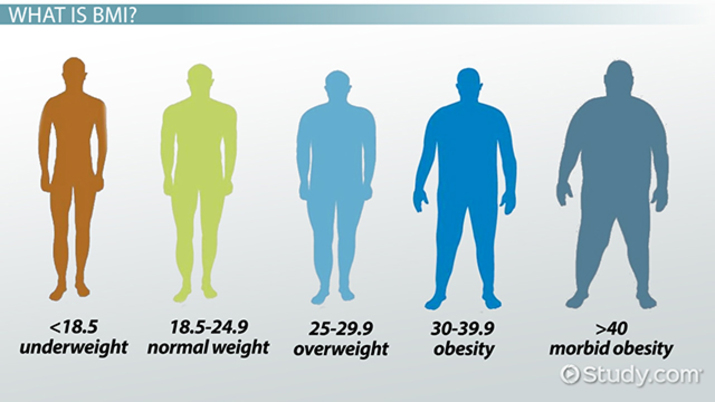

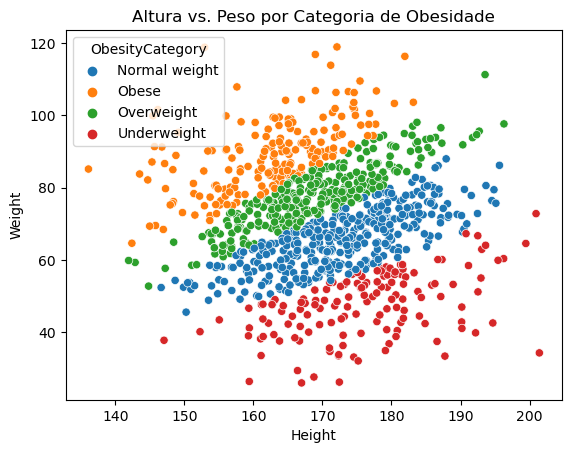

In [9]:
sns.scatterplot(x='Height', y='Weight', hue='ObesityCategory', data=data)
plt.title('Altura vs. Peso por Categoria de Obesidade')
plt.show()

## 1.5 Tratamento dos Dados

### 1.5.1 Criando Variável de Tratamento

In [10]:
df = data

### 1.5.2 Mapeando as Strings para Inteiros

In [11]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,Normal weight
1,69,0,164.127306,89.959256,33.395209,2,Obese
2,46,1,168.072202,72.930629,25.817737,4,Overweight
3,32,0,168.459633,84.886912,29.912247,3,Overweight
4,60,0,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,0,155.588674,64.103182,26.480345,4,Overweight
996,35,1,165.076490,97.639771,35.830783,1,Obese
997,49,1,156.570956,78.804284,32.146036,1,Obese
998,64,0,164.192222,57.978115,21.505965,4,Normal weight


In [12]:
df['ObesityCategory'] = df['ObesityCategory'].map({'Normal weight': 0, 'Obese':1,'Overweight': 2, 'Underweight': 3})
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.575262,71.982051,23.891783,4,0
1,69,0,164.127306,89.959256,33.395209,2,1
2,46,1,168.072202,72.930629,25.817737,4,2
3,32,0,168.459633,84.886912,29.912247,3,2
4,60,0,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,0,155.588674,64.103182,26.480345,4,2
996,35,1,165.076490,97.639771,35.830783,1,1
997,49,1,156.570956,78.804284,32.146036,1,1
998,64,0,164.192222,57.978115,21.505965,4,0


### 1.5.3 Selecionando Colunas de Comparação

In [13]:
columns = ['Age','Gender','Height','Weight','PhysicalActivityLevel','ObesityCategory']

In [14]:
df = df[columns]

### 1.5.4 Definindo o X e Y de Predição do Modelo

In [15]:
x_columns = ['Age','Gender','Height','Weight','PhysicalActivityLevel']
X = df[x_columns]
y = df['ObesityCategory']

In [16]:
print(X)
print(y)

     Age  Gender      Height     Weight  PhysicalActivityLevel
0     56       0  173.575262  71.982051                      4
1     69       0  164.127306  89.959256                      2
2     46       1  168.072202  72.930629                      4
3     32       0  168.459633  84.886912                      3
4     60       0  183.568568  69.038945                      3
..   ...     ...         ...        ...                    ...
995   18       0  155.588674  64.103182                      4
996   35       1  165.076490  97.639771                      1
997   49       1  156.570956  78.804284                      1
998   64       0  164.192222  57.978115                      4
999   66       1  178.537130  74.962164                      1

[1000 rows x 5 columns]
0      0
1      1
2      2
3      2
4      0
      ..
995    2
996    1
997    1
998    0
999    0
Name: ObesityCategory, Length: 1000, dtype: int64


### 1.5.5 Separando as variáveis de Treino e de Teste

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.5.6 Utilizando o Modelo de Árvore de Decisão

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

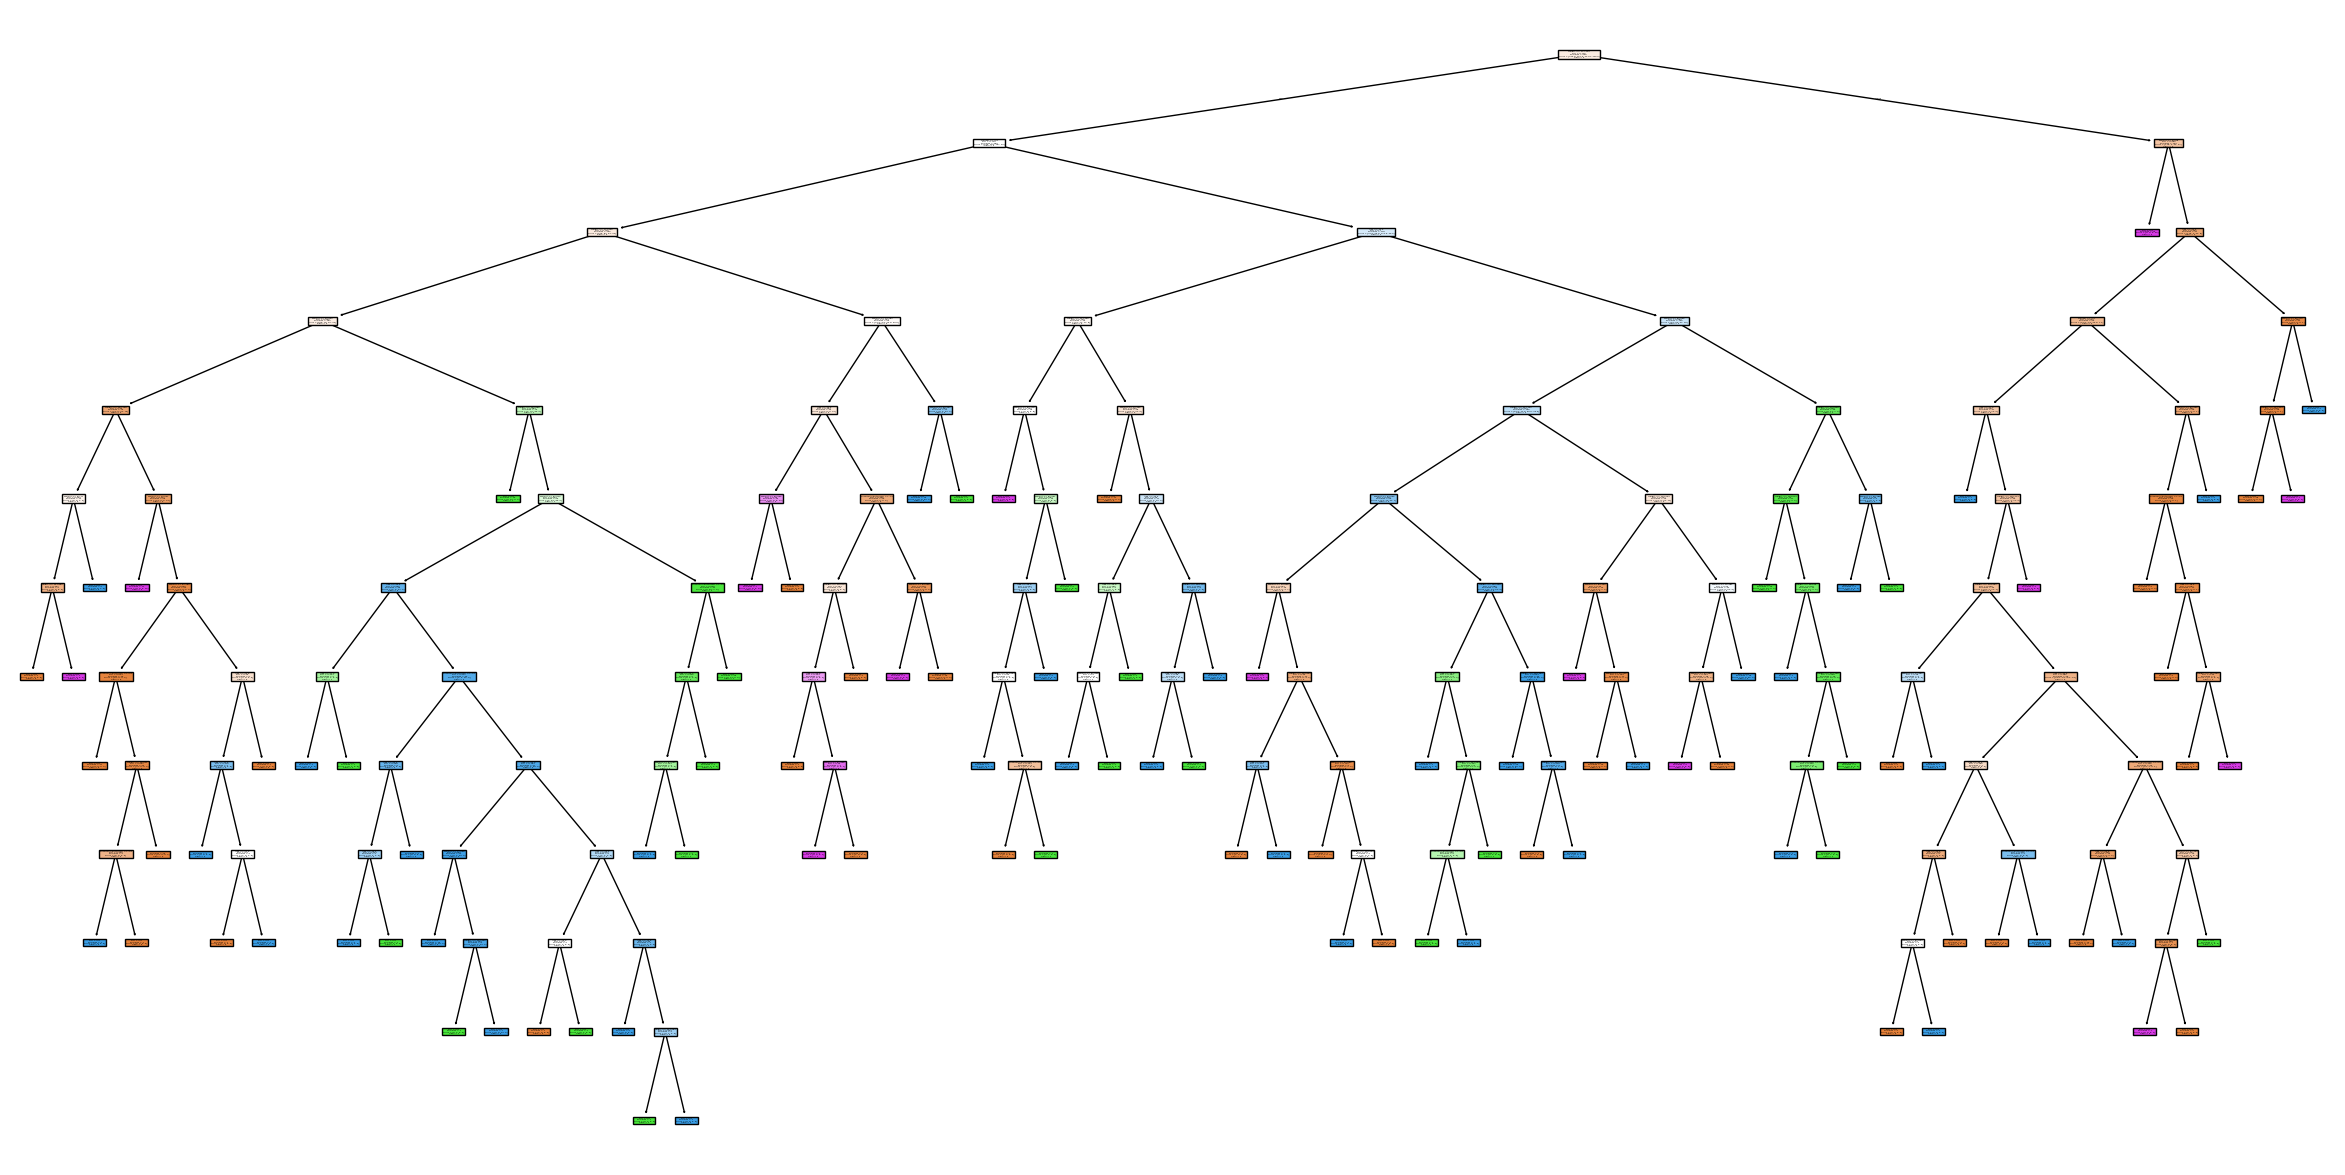

In [20]:
tree = model.estimators_[0]
class_names = [str(cls) for cls in y.unique()]


plt.figure(figsize=(30, 15)) 
plot_tree(tree, feature_names=x_columns, class_names=class_names, filled=True)
plt.show()

In [21]:
y_pred = model.predict(X_test)

### 1.5.7 Treinando o Modelo

In [22]:
comparison_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
print(comparison_df)


     Real  Predito
521     2        2
737     2        2
740     2        2
660     0        0
411     2        2
..    ...      ...
408     2        2
332     0        0
208     3        3
613     0        0
78      0        0

[200 rows x 2 columns]


### 1.5.8 Demonstrando a Matriz de Confusão

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

Matriz de Confusão:
 [[69  0  2  1]
 [ 0 31  1  0]
 [ 5  2 58  0]
 [ 3  0  0 28]]


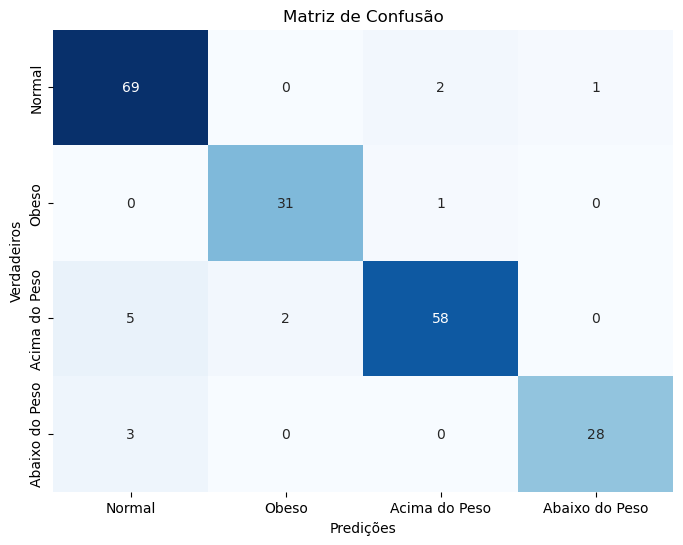

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
             xticklabels=['Normal', 'Obeso','Acima do Peso','Abaixo do Peso'], yticklabels=['Normal', 'Obeso','Acima do Peso','Abaixo do Peso'])
plt.xlabel('Predições')
plt.ylabel('Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### 1.5.9 Demonstrando a Precisão de acordo com as Categorias de Obesidade

In [25]:
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", class_report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        72
           1       0.94      0.97      0.95        32
           2       0.95      0.89      0.92        65
           3       0.97      0.90      0.93        31

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



### 1.5.10 Aplicando o modelo a dados aleatórios

In [26]:
random_data = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=5),
    'Gender': np.random.randint(0, 2, size=5),
    'Height': np.random.uniform(150, 200, size=5),
    'Weight': np.random.uniform(50, 120, size=5),
    'PhysicalActivityLevel': np.random.randint(1, 5, size=5)
})

random_predictions = model.predict(random_data)

df.loc[:, 'ObesityCategory'] = df['ObesityCategory'].map({'Normal weight': 0, 'Obese':1, 'Overweight': 2, 'Underweight': 3})

dictionary = {
    0: 'Normal',
    1: 'Obeso',
    2: 'Acima do Peso',
    3: 'Abaixo do Peso'
}
print(random_data)
predicted_categories = [dictionary[pred] for pred in random_predictions]

print("Predições para dados aleatórios:\n", predicted_categories)

   Age  Gender      Height      Weight  PhysicalActivityLevel
0   31       1  164.044520   93.729264                      4
1   50       1  189.706559  110.833098                      2
2   40       1  160.403498  115.714854                      3
3   30       0  169.803418   70.711996                      1
4   47       0  197.271957   93.444615                      1
Predições para dados aleatórios:
 ['Obeso', 'Acima do Peso', 'Obeso', 'Normal', 'Acima do Peso']


In [27]:
response = random_data

response['IBM/IMC'] = response.apply(lambda x: x['Weight'] / ((x['Height'] / 100) ** 2), axis=1)

In [28]:
response

,Age,Gender,Height,Weight,PhysicalActivityLevel,IBM/IMC
0,31,1,164.044520,93.729264,4,34.829862
1,50,1,189.706559,110.833098,2,30.796742
2,40,1,160.403498,115.714854,3,44.973992
3,30,0,169.803418,70.711996,1,24.524505
4,47,0,197.271957,93.444615,1,24.011737


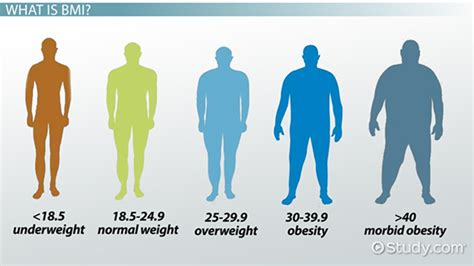